<a href="https://colab.research.google.com/github/karenwhite33/NLP_Sentiment_Analysis_User_Reviews/blob/main/3b_Deep_Learning__NLP_Amazon_Sent_Analysis_scientific_products.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔺 **3b. Modelo de clasificación NLP con Deep Learning: Modelo Red neuronal Simple**


Para mis datos review y teniendo en cuenta que ya he usado modelos tradicionales como Regresión Logística y XGBoost, lo ideal sería utilizar un modelo de red neuronal profunda (Deep Learning) para aprovechar la capacidad de las redes neuronales de capturar patrones más complejos en los datos.

Opciones de modelos de Deep Learning:

**Redes Neuronales de Feedforward (DNN - Deep Neural Networks):**

Ventaja: Fácil de implementar y útil para tareas simples con datos estructurados.

Ideal para: Modelos sencillos para datos tabulares o transformados (como los vectores TF-IDF).

**Redes Neuronales Recurrentes (RNN - Recurrent Neural Networks) o LSTM (Long Short-Term Memory):**

Ventaja: Son excelentes para aprender dependencias temporales y secuenciales, lo cual es clave para el análisis de texto donde el orden de las palabras es importante.

Ideal para: Análisis de secuencias, como series temporales o texto donde el contexto entre las palabras importa.

**Redes Neuronales Convolucionales (CNN - Convolutional Neural Networks):**

Ventaja: Aunque las CNNs se usan comúnmente para imágenes, también son efectivas para procesar texto porque pueden aprender patrones locales (como combinaciones de palabras).

Ideal para: Procesamiento de texto cuando se desea capturar patrones locales dentro de las secuencias de palabras.

**Transformers (como BERT o GPT):**

Ventaja: Transformers como BERT son muy potentes para tareas de NLP y han demostrado ser líderes en muchas tareas de procesamiento de lenguaje natural.

Ideal para: Tareas complejas de NLP con un alto rendimiento.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [110]:
# Cargar el df_fullpro (full preprocesado) desde el archivo Pickle
df = pd.read_pickle('/content/drive/MyDrive/NLP_2024/Project/dataset/pkl/df_totrain.pkl')

In [111]:
# Eliminar columnas innecesarias
df = df[['fullProcessedReview', 'sentiment_label']]


# Verificar la transformación
df.head()


,fullProcessedReview,sentiment_label
0,mask great even though inside outside let know...,0
1,scissors good got stolen one home care aide re...,0
2,good sensor push easier work reliable,0
3,great orb finish size bought laundry room closet,0
4,wow sticking power stuff crazy using mount pro...,0


In [112]:
# Ver las categorías únicas y sus conteos
print("Categorías únicas y sus conteos:")
print(df['sentiment_label'].value_counts())

# Ver tipos de datos de la columna
print("\nTipo de datos de 'sentiment_label':", df['sentiment_label'].dtype)


Categorías únicas y sus conteos:
sentiment_label
0    5000
1    5000
Name: count, dtype: int64

Tipo de datos de 'sentiment_label': int64


In [113]:
# guardar df con full preprocesado
df.to_pickle("/content/drive/MyDrive/NLP_2024/Project/dataset/best_models/to_deeplearning.pkl")

print("Modelo guardado correctamente.")

Modelo guardado correctamente.


In [114]:
# Cargar el df modelo limpio -preprocesado para Deep Learning
df = pd.read_pickle('/content/drive/MyDrive/NLP_2024/Project/dataset/best_models/to_deeplearning.pkl')

In [115]:
df.head()


,fullProcessedReview,sentiment_label
0,mask great even though inside outside let know...,0
1,scissors good got stolen one home care aide re...,0
2,good sensor push easier work reliable,0
3,great orb finish size bought laundry room closet,0
4,wow sticking power stuff crazy using mount pro...,0


In [116]:
df.tail()

,fullProcessedReview,sentiment_label
9995,baby bottle brush local retail store would pre...,1
9996,clear sound,1
9997,sent think copper sheet bronze match copper pi...,1
9998,junk first one used broke upon gentle tighteni...,1
9999,work great existing meter nice better resoluti...,0


# **Verificación de Nans**

In [117]:
# Verificar columnas relevantes
print(df.columns)

# Confirmar que no haya valores nulos
print(df.isnull().sum())

# Opcional: Eliminar filas con valores nulos en las columnas necesarias (si existieran)

print(f"Dimensiones del DataFrame después de eliminar nulos: {df.shape}")


Index(['fullProcessedReview', 'sentiment_label'], dtype='object')
fullProcessedReview    0
sentiment_label        0
dtype: int64
Dimensiones del DataFrame después de eliminar nulos: (10000, 2)


## **Conversión de texto en numericas Vectorizer BOW (bag-of-words)**


Cada reseña se convierte en un vector donde cada posición representa una palabra única del vocabulario.

*  Frecuencias absolutas: Número de veces que aparece la palabra.
*  TF-IDF (Term Frequency-Inverse Document Frequency): Pondera la importancia de las palabras en el documento y en todo el corpus.

Usaré TfidfVectorizer de scikit-learn porque ayuda a reducir la influencia de palabras comunes.

**Parámetros**

**max_df=0.95:**

Este parámetro elimina las palabras que aparecen en más del 95% de los documentos. Las palabras extremadamente comunes como "great", "good", "product" aportan poco valor al modelo porque aparecen tanto en reseñas positivas como negativas.

**min_df=3:**

Este parámetro elimina palabras que aparecen en menos de 3 documentos.
Las palabras extremadamente raras no aportan valor significativo al modelo y pueden introducir ruido.

**max_features=2500:**

Limita el vocabulario a las 2500 palabras más importantes según la métrica TF-IDF. Ayuda a reducir la dimensionalidad del problema y a mantener un vocabulario manejable.

**strip_accents='ascii':**

Convierte caracteres con acentos a su forma básica. Mejora la consistencia del texto y reduce el vocabulario redundante.

**ngram_range=(1, 2):**
Captura tanto unigrams como bigrams proporcionando contexto adicional en reseñas cortas.

In [118]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Configuración del TfidfVectorizer
cv = TfidfVectorizer(
    max_df=0.95,
    min_df=3,
    max_features=2500,
    strip_accents='ascii',
    ngram_range=(1, 2)
)

# Aplicar el vectorizador al texto
X_bow = cv.fit_transform(df['fullProcessedReview']).toarray()

# Etiquetas de salida
y = df['sentiment_label']

# Inspeccionar las dimensiones de la matriz
print(f"Dimensiones de X_bow: {X_bow.shape}")  # (n_reviews, 2500)
print(f"Distribución de las etiquetas: {y.value_counts()}")


Dimensiones de X_bow: (10000, 2500)
Distribución de las etiquetas: sentiment_label
0    5000
1    5000
Name: count, dtype: int64


In [119]:
# Separar las etiquetas
y = df['sentiment_label']

# Verificar la distribución de las etiquetas
import numpy as np
unique, counts = np.unique(y, return_counts=True)
print(f"Distribución de las etiquetas: {dict(zip(unique, counts))}")


Distribución de las etiquetas: {0: 5000, 1: 5000}


## **Revisión de reviews random después de Vectorizar**

In [122]:
# Elegir un índice aleatorio
sample_index = 2689  # Cambia este índice para ver otras reseñas

# Ver la reseña original
original_review = df['fullProcessedReview'].iloc[sample_index]
print("Reseña original:")
print(original_review)

# Ver su representación vectorizada
vectorized_review = X_bow[sample_index]
print("\nVector TF-IDF (primeros 10 valores):")
print(vectorized_review[:10])

# Mostrar palabras más relevantes del vectorizador
feature_names = cv.get_feature_names_out()
important_words = [(feature_names[i], vectorized_review[i]) for i in range(len(feature_names)) if vectorized_review[i] > 0]

# Mostrar las palabras más relevantes de la reseña
print("\nPalabras relevantes en la reseña:")
for word, score in sorted(important_words, key=lambda x: -x[1])[:10]:
    print(f"{word}: {score:.4f}")


Reseña original:
simple value bend fit top seat big trk

Vector TF-IDF (primeros 10 valores):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Palabras relevantes en la reseña:
seat: 0.5173
bend: 0.4282
simple: 0.3971
value: 0.3422
big: 0.3186
top: 0.3165
fit: 0.2696


In [123]:
# Mostrar solo valores no cero y sus índices
non_zero_indices = np.nonzero(vectorized_review)[0]
print("Índices no cero y sus valores:")
for idx in non_zero_indices[:10]:  # Mostrar hasta 10 para simplicidad
    print(f"Índice: {idx}, Valor TF-IDF: {vectorized_review[idx]:.4f}, Palabra: {feature_names[idx]}")


Índices no cero y sus valores:
Índice: 171, Valor TF-IDF: 0.4282, Palabra: bend
Índice: 182, Valor TF-IDF: 0.3186, Palabra: big
Índice: 797, Valor TF-IDF: 0.2696, Palabra: fit
Índice: 1864, Valor TF-IDF: 0.5173, Palabra: seat
Índice: 1942, Valor TF-IDF: 0.3971, Palabra: simple
Índice: 2220, Valor TF-IDF: 0.3165, Palabra: top
Índice: 2326, Valor TF-IDF: 0.3422, Palabra: value


# **División datos vectorizados en Train y Test**

In [124]:
from sklearn.model_selection import train_test_split

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_bow, y, test_size=0.25, random_state=42, stratify=y
)

# Verificar dimensiones y distribuciones
print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Distribución en y_train: {np.bincount(y_train)}")
print(f"Distribución en y_test: {np.bincount(y_test)}")



Dimensiones de X_train: (7500, 2500)
Dimensiones de X_test: (2500, 2500)
Distribución en y_train: [3750 3750]
Distribución en y_test: [1250 1250]


## **Guardar conjunto de datos vectorizados**

In [125]:
import numpy as np

# Guardar los datos
np.save('/content/drive/MyDrive/NLP_2024/Project/dataset/dl_data/X_train.npy', X_train)
np.save('/content/drive/MyDrive/NLP_2024/Project/dataset/dl_data/X_test.npy', X_test)
np.save('/content/drive/MyDrive/NLP_2024/Project/dataset/dl_data/y_train.npy', y_train)
np.save('/content/drive/MyDrive/NLP_2024/Project/dataset/dl_data/y_test.npy', y_test)

print("Datos guardados con éxito.")


Datos guardados con éxito.


**En caso de volver a cargar conjunto de datos sin tener que dividir de nuevo**

In [ ]:
# Cargar los datos guardados
X_train = np.load('/content/drive/MyDrive/NLP_2024/Project/dataset/X_train.npy')
X_test = np.load('/content/drive/MyDrive/NLP_2024/Project/dataset/X_test.npy')
y_train = np.load('/content/drive/MyDrive/NLP_2024/Project/dataset/y_train.npy')
y_test = np.load('/content/drive/MyDrive/NLP_2024/Project/dataset/y_test.npy')

# Verificar dimensiones
print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Distribución en y_train: {np.bincount(y_train)}")
print(f"Distribución en y_test: {np.bincount(y_test)}")


# **Preparación para Deep Learning**

Ahora que estan creados los conjuntos de Train y Test, el siguiente paso es convertir los datos tokenizados a tensores de PyTorch. Esto es necesario para entrenar el modelo.

*  Escalar los datos: Aunque TF-IDF genera vectores normalizados, debo asegurarme de que los datos estén bien escalados.

*  Definir el modelo: Usaré una red neuronal densa (fully connected) como punto de partida.



# 🗯 **Train Red Neuronal Simple**

Utilizaré esta arquitectura:

model = Sequential([

    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  
    Dense(256, activation='relu'),
    Dropout(0.3),  
    Dense(1, activation='sigmoid')  # Salida binaria
])

*  **512 neuronas:**

Elegí este valor porque es un número común para redes densas, lo suficientemente grande para captar patrones complejos.
Las redes densas requieren muchas neuronas debido a la gran dimensionalidad del vector de entrada (2,500 características).

*  **activation='relu':**

Se utiliza para evitar problemas de saturación y mejorar el aprendizaje de características no lineales.

*  **Regularización - Dropout(0.3)**

La aplico para prevenir overfitting, desactivando aleatoriamente el 30% de las neuronas durante el entrenamiento.
Esto hace que el modelo dependa menos de combinaciones específicas de neuronas.

**Segunda Capa Densa:**

*  **256 neuronas:**

Reduce progresivamente el número de neuronas para simplificar el modelo y evitar sobreajuste. Sigo usando ReLU para captar patrones complejos.

*  **Otra Capa de Dropout:**

Aplico otra regularización para mantener la generalización.

**Capa de Salida:**

*  **1 neurona:**

Una sola neurona porque es una tarea binaria.

*  **activation='sigmoid':**
Convierte la salida en un valor entre 0 y 1, interpretado como la probabilidad de la clase positiva (1).


**Compilación del Modelo:**

*  **optimizer=Adam:**

Ajustará la tasa de aprendizaje según el progreso del entrenamiento. Es eficaz para problemas de clasificación.

*  **loss='binary_crossentropy':**

Como utilizo clsificacion binaria, el cross entropy mide la diferencia entre las probabilidades predichas y las verdaderas.

*  **metrics=['accuracy']:**

Evaluo el rendimiento usandoel accuracy como métrica principal.

**Entrenamiento del Modelo:**

*  **epochs=10:**

Comenzaré con 10 épocas para ver cómo se comporta el modelo. Puedo aumentar si no se alcanza una buena precisión, boy probando segun eficiencia computacional tambien.

*  **batch_size=32:**

Procesa 32 muestras a la vez que equilibra velocidad y uso de memoria.

* **validation_data=(X_test, y_test):**

Evaluo el modelo en el conjunto de prueba después de cada época para monitorear el sobreajuste.

# **Training Modelo Red neuronal Simple**

In [126]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Definir el modelo
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # Regularización
    Dense(256, activation='relu'),
    Dropout(0.3),  # Regularización
    Dense(1, activation='sigmoid')  # Salida binaria
])

# Compilar el modelo
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    epochs=10,  # Puedes aumentar este valor
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - accuracy: 0.7147 - loss: 0.5594 - val_accuracy: 0.8216 - val_loss: 0.3872
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - accuracy: 0.8956 - loss: 0.2638 - val_accuracy: 0.8192 - val_loss: 0.4087
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.9364 - loss: 0.1698 - val_accuracy: 0.8128 - val_loss: 0.5065
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.9792 - loss: 0.0766 - val_accuracy: 0.8108 - val_loss: 0.6214
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.9851 - loss: 0.0438 - val_accuracy: 0.8152 - val_loss: 0.7281
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - accuracy: 0.9916 - loss: 0.0213 - val_accuracy: 0.8072 - val_loss: 0.7759
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9924 - loss: 0.0183 - val_accuracy: 0.8048 - val_loss: 0.8819
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.9930 - loss: 0.0169 - va

In [127]:
from sklearn.metrics import classification_report, confusion_matrix

# Predicciones en el conjunto de prueba
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Mostrar métricas de clasificación
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

# Mostrar la matriz de confusión
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))


79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81      1250
           1       0.82      0.80      0.81      1250

    accuracy                           0.81      2500
   macro avg       0.81      0.81      0.81      2500
weighted avg       0.81      0.81      0.81      2500

Matriz de confusión:
 [[1029  221]
 [ 256  994]]


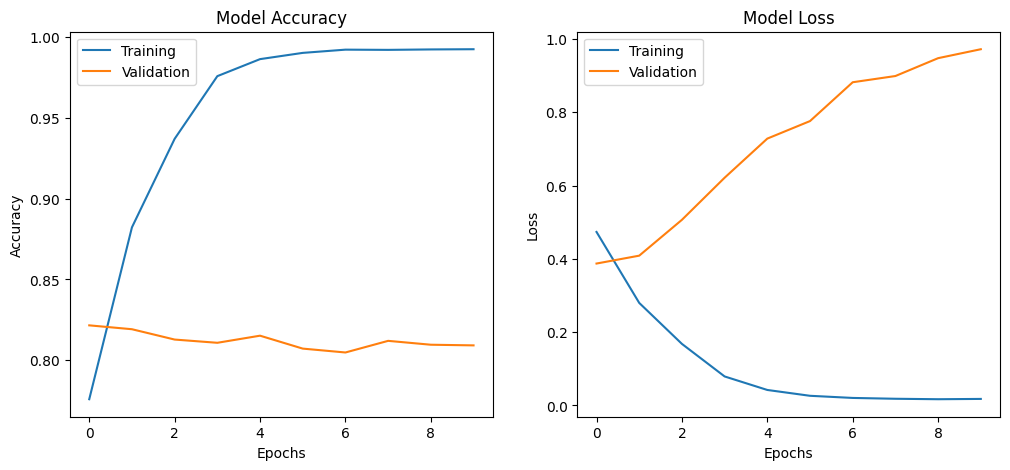

In [129]:
import matplotlib.pyplot as plt

# Visualize Model Performance
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


## **Análisis 1ra etapa de modelo Red simple**

*  **Exactitud (Model Accuracy):**

Aumenta rápidamente y se estabiliza cerca del 100%, lo que indica que el modelo está sobreajustando a los datos de entrenamiento.

En val se mantiene constante, alrededor del 81%, lo que demuestra que el modelo no está generalizando bien a datos no vistos.

La brecha entre la exactitud de entrenamiento y validación es una clara señal de sobreajuste.

*  **Pérdida (Model Loss):**

La perdida disminuye constantemente, como se espera mientras el modelo aprende.
En val la perdida aumenta después de la primera época, lo que indica que el modelo comienza a memorizar los datos de entrenamiento en lugar de generalizar.

El modelo está aprendiendo ruido del conjunto de entrenamiento y no logra mejorar en los datos de validación.

# **Optimización Modelo red simple + cambio parámetros**

*  **1. Dropout (Aumentar)**

Razón: Las gráficas muestran sobreajuste significativo; Dropout ayuda a combatirlo desactivando neuronas de forma aleatoria durante el entrenamiento.

Lo incrementaré de 0.3 a 0.4 o 0.5 en ambas capas.

*  **2. Regularización L2 (Agregar o Incrementar)**

Razón: La pérdida en validación aumenta rápidamente, lo que sugiere que el modelo está aprendiendo patrones excesivamente complejos. L2 limita los valores de los pesos del modelo.

Añadiré kernel_regularizer=l2(0.01) en las capas densas.

* **3. Learning Rate (Disminuir)**

Razón: Un lr alto puede estar causando que el modelo se ajuste demasiado rápido a los datos de entrenamiento, lo que lleva a un sobreajuste prematuro.

Reduciré el lr de 0.001 a 0.0001 en el optimizador Adam.

* **4. Número de Neuronas (Disminuir)**

Razón: Tener muchas neuronas (512, 256) en cada capa puede hacer que el modelo sea demasiado complejo para el tamaño del dataset.

Reduciré el número de neuronas a valores más pequeños:

Primera capa: 256 neuronas.
Segunda capa: 128 neuronas.

*  **5. Early Stopping (Agregar o Ajustar)**

El modelo sigue entrenando incluso cuando la pérdida de validación aumenta, lo que confirma sobreajuste.

Implementaré EarlyStopping con:
patience=3 (detener después de 3 épocas sin mejora).
restore_best_weights=True.

*  **6. Batch Size (Incrementar)**
Lo mantendré igual por razones computacionales.

In [130]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# Definir el modelo mejorado
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)),
    Dropout(0.4),  # Regularización
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.4),
    Dense(1, activation='sigmoid')  # Clasificación binaria
])

# Compilar el modelo
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Aplicar Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,  # Detiene si no mejora en 3 épocas
    restore_best_weights=True
)

# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    epochs=50,  # Más épocas para mejorar
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    verbose=1
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.5252 - loss: 9.5251 - val_accuracy: 0.7052 - val_loss: 3.7230
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.6686 - loss: 2.9408 - val_accuracy: 0.7436 - val_loss: 1.4918
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - accuracy: 0.7441 - loss: 1.2970 - val_accuracy: 0.7832 - val_loss: 0.9220
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.7782 - loss: 0.8638 - val_accuracy: 0.8124 - val_loss: 0.7399
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.8170 - loss: 0.7117 - val_accuracy: 0.8176 - val_loss: 0.6575
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 61ms/step - accuracy: 0.8252 - loss: 0.6404 - val_accuracy: 0.8240 - val_loss: 0.6216
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 63ms/step - accuracy: 0.8260 - loss: 0.6116 - val_accuracy: 0.8276 - val_loss: 0.6064
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - accuracy: 0.8392 - loss: 0.5936 - 

In [131]:
from sklearn.metrics import classification_report, confusion_matrix

# Predicciones en el conjunto de prueba
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Mostrar el reporte de clasificación
print("Classification Report:\n", classification_report(y_test, y_pred))

# Mostrar la matriz de confusión
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      1250
           1       0.83      0.84      0.83      1250

    accuracy                           0.83      2500
   macro avg       0.83      0.83      0.83      2500
weighted avg       0.83      0.83      0.83      2500

Confusion Matrix:
 [[1028  222]
 [ 200 1050]]


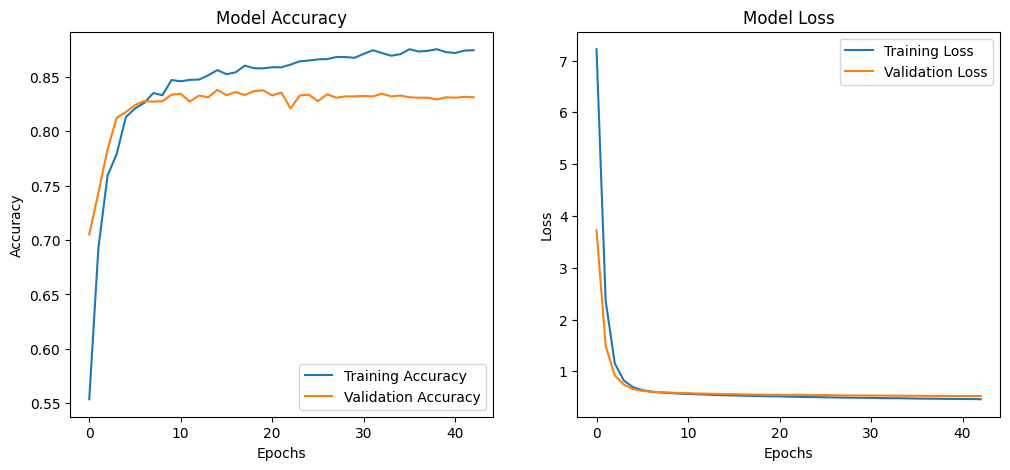

In [132]:
import matplotlib.pyplot as plt

# Visualizar Exactitud
plt.figure(figsize=(12, 5))

# Gráfico de Exactitud
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Gráfico de Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


# **Análisis del Reporte de Clasificación Modelo red simple optimizado:**

**Accuracy General: 83%**

Mejoró respecto al modelo anterior, que estaba en 81%. Esto indica que las optimizaciones (Dropout, L2, learning rate) han reducido el sobreajuste.

*  **Clase 0 (Negativas):**

Precisión (Precision): 84%
De las predicciones que hizo como negativas, el 84% fueron correctas.

Recall: detectó el 82% de todas las reseñas realmente negativas.

F1-Score: 83% buen balance entre precisión y recall.

*  **Clase 1 (Positivas):**

Precisión (Precision): 83%
De las predicciones que hizo como positivas, el 83% fueron correctas.

Recall: 84%
Detectó el 84% de todas las reseñas realmente positivas.

F1-Score: 83%
También bien balanceado.


**Análisis de la Matriz de Confusión:**

Verdaderos Negativos (1028):
El modelo clasificó correctamente 1028 reseñas negativas.

Falsos Positivos (222):
Clasificó como positivas 222 reseñas que eran negativas.

Falsos Negativos (200):
Clasificó como negativas 200 reseñas que eran positivas.

Verdaderos Positivos (1050):
Clasificó correctamente 1050 reseñas positivas.

Hay menos errores (falsos positivos y falsos negativos) en comparación con el modelo anterior, lo que indica una mejora en la generalización.

**Análisis de accuracy y loss del Modelo Optimizado**


*  **1. Accuracy**

Training Accuracy:
Sube de manera estable y se estabiliza cerca del 86%, mostrando que el modelo está aprendiendo de los datos de entrenamiento.

Validation Accuracy:
Se estabiliza alrededor del 83%, lo cual es consistente con los resultados del reporte de clasificación.

La brecha entre las curvas de entrenamiento y validación es pequeña, lo que indica que las optimizaciones redujeron significativamente el sobreajuste.

**El modelo generaliza mejor, con un buen balance entre entrenamiento y validación.**

*  **2. Loss (Gráfica Derecha):**
Training Loss:
Disminuye de forma constante, lo cual es esperado mientras el modelo aprende.

Validation Loss:
Disminuye junto con la pérdida de entrenamiento y luego se estabiliza, sin señales significativas de aumento.

**La estabilidad en la pérdida de validación confirma que Early Stopping y las regularizaciones evitaron el sobreajuste.**

In [133]:
# Guardar el modelo completo
model.save('/content/drive/MyDrive/NLP_2024/Project/dataset/dl_data/dl_1optimzed_083.keras')

print("Modelo guardado con éxito.")


Modelo guardado con éxito.


# **Implementación Modelo LSTM para clasificar texto**

1. Se debe tokenizar para el modelo LSTM
2. Traformar de palabras a indices
3. Análsisi de longitud de reseñas
4. Prepearación de datos con padding
5. Definición del modelo
6. Compilación
7. Entrenamiento y validación
8. Evaluar Modlo

In [138]:
import pandas as pd

# Cargar el DataFrame
df = pd.read_pickle('/content/drive/MyDrive/NLP_2024/Project/dataset/best_models/to_deeplearning.pkl')

# Verificar las primeras filas del DataFrame
print(df.head())


                                 fullProcessedReview  sentiment_label
0  mask great even though inside outside let know...                0
1  scissors good got stolen one home care aide re...                0
2              good sensor push easier work reliable                0
3   great orb finish size bought laundry room closet                0
4  wow sticking power stuff crazy using mount pro...                0


In [139]:
print(df.tail())

                                    fullProcessedReview  sentiment_label
9995  baby bottle brush local retail store would pre...                1
9996                                        clear sound                1
9997  sent think copper sheet bronze match copper pi...                1
9998  junk first one used broke upon gentle tighteni...                1
9999  work great existing meter nice better resoluti...                0


## **Transformaré la columna fullProcessedReview en secuencias de índices numéricos**

Si el vocabulario es demasiado grande, puede incluir palabras que aparecen muy pocas veces, lo que no aporta valor al modelo.

Uitlizaré el tamaño de 5,000 palabras para el dataset de 10,000 reseñas, ya que las palabras más comunes suelen concentrar la mayor parte del significado.


In [140]:
# Calcular longitudes de las reseñas
review_lengths = [len(seq) for seq in X_sequences]

# Calcular estadísticas clave
import numpy as np

mean_length = np.mean(review_lengths)
max_length = np.max(review_lengths)
median_length = np.median(review_lengths)

print(f"Longitud media de las reseñas: {mean_length:.2f}")
print(f"Longitud máxima de las reseñas: {max_length}")
print(f"Longitud mediana de las reseñas: {median_length}")


Longitud media de las reseñas: 28.15
Longitud máxima de las reseñas: 681
Longitud mediana de las reseñas: 16.0


### **Cálculo de la media de palabras para tener un aproximado de cuantas palabras utilizar en el train del modelo**

**Media:** 28 palabras

La mayoría de las reseñas son bastante cortas.

**Mediana: 16 palabras**

Esto confirma que muchas reseñas tienen menos de 30 palabras.

**Máxima: 681 palabras**

Algunas reseñas son muy largas, pero son outliers que podría truncar para optimizar el modelo.

**100 palabras:**

Captura mejor las reseñas largas pero requiere más memoria y aumenta el tiempo de entrenamiento.

In [141]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Inicializamos el Tokenizer con un vocabulario limitado
vocabulary_size = 5000  # Tamaño máximo del vocabulario
tokenizer = Tokenizer(num_words=vocabulary_size, oov_token="<OOV>")

# Ajustamos el tokenizador a las reseñas
tokenizer.fit_on_texts(df['fullProcessedReview'])

# Transformamos las reseñas en secuencias de índices
X_sequences = tokenizer.texts_to_sequences(df['fullProcessedReview'])

# Verificamos un ejemplo de secuencia tokenizada
print("Ejemplo de secuencia tokenizada:")
print(X_sequences[0])


Ejemplo de secuencia tokenizada:
[26, 7, 29, 163, 150, 393, 240, 72, 1203, 26, 150, 14, 81, 166, 274, 12, 77, 4774]


## **Aplicar padding a las secuencias**

Para que todas las reviews tengan una longitud uniforme de 100 palabras, con ceros añadidos donde sea necesario.



In [142]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Definir longitud máxima de las secuencias
max_words = 100  # Número de palabras por reseña

# Aplicar padding a las secuencias
X_padded = pad_sequences(X_sequences, maxlen=max_words, padding='post', truncating='post')

# Verifica el tamaño de la secuencia procesada
print("Ejemplo de secuencia después de padding:")
print(X_padded[0])
print(f"Tamaño de X_padded: {X_padded.shape}")


Ejemplo de secuencia después de padding:
[  26    7   29  163  150  393  240   72 1203   26  150   14   81  166
  274   12   77 4774    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
Tamaño de X_padded: (10000, 100)


## **Division en Train y test Modelo LSTM**

In [143]:
from sklearn.model_selection import train_test_split

# Definir las etiquetas
y = df['sentiment_label']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_padded, y, test_size=0.25, random_state=42, stratify=y
)

# Verificar tamaños
print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Distribución de y_train: {np.bincount(y_train)}")
print(f"Distribución de y_test: {np.bincount(y_test)}")


Tamaño de X_train: (7500, 100)
Tamaño de X_test: (2500, 100)
Distribución de y_train: [3750 3750]
Distribución de y_test: [1250 1250]


## 🔼 **Definir Modelo LSTM**

Construiré el modelo LSTM utilizando una capa de embeddings, una capa LSTM y una capa de salida para clasificación binaria.

*  **Embedding Layer:**

**input_dim=5000:** Tamaño del vocabulario, 5000 porque cubre las palabras más frecuentes de tu dataset, según el análisis previo. Evita incluir palabras raras y ruidosas, mejorando la eficiencia y reduciendo el riesgo de sobreajuste.

**output_dim=32:** Tamaño del embedding estándar para tareas de clasificación de texto con datasets medianos ~10,000 registros.

**input_length=100:** Defino 100 palabras porque, según el análisis, es una longitud adecuada que captura más del 90% de las reseñas sin incluir demasiado relleno.

*  **LSTM Layer:**

**lstm_units=100:** Captura dependencias de secuencia. Más unidades ayudarían a modelar secuencias largas, pero aumentarían el costo computacional. Menos unidades podrían no captar suficientes dependencias entre palabras.

**return_sequences=False:** Solo devuelve la última salida. Solo necesito una probabilidad final (0 o 1), no toda la secuencia procesada.

* **Output Layer:**

Dense(1, activation='sigmoid'):
Solo necesitamos una neurona para devolver una probabilidad binaria (0 o 1).
sigmoid devuelve una probabilidad entre 0 y 1.


In [145]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Definir hiperparámetros
embedding_size = 32  # Tamaño de los vectores de palabras
lstm_units = 100  # Número de unidades LSTM

# Definir el modelo LSTM corregido
model = Sequential([
    Embedding(input_dim=5000, output_dim=embedding_size),
    LSTM(lstm_units, return_sequences=False),
    Dense(1, activation='sigmoid')  # Capa de salida binaria
])

# Compilar el modelo
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Mostrar el resumen del modelo corregido
model.build(input_shape=(None, 100))  # Especificamos la forma de entrada correcta
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 100, 32)             │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100)                 │          53,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 213,301 (833.21 KB)

 Trainable params: 213,301 (833.21 KB)

 Non-trainable params: 0 (0.00 B)

## **Entrenamiento Modelo LSTM**

In [146]:
from tensorflow.keras.callbacks import EarlyStopping

# Configurar Early Stopping para evitar sobreajuste
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Entrenar el modelo con batch_size=32
history = model.fit(
    X_train, y_train,
    epochs=10,            # Número de épocas inicial
    batch_size=32,        # Ajustado según tu PC
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 33s 131ms/step - accuracy: 0.5100 - loss: 0.6929 - val_accuracy: 0.5040 - val_loss: 0.6932
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 49s 166ms/step - accuracy: 0.5152 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.7025
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 37s 147ms/step - accuracy: 0.5061 - loss: 0.6944 - val_accuracy: 0.5052 - val_loss: 0.6928
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 33s 115ms/step - accuracy: 0.5071 - loss: 0.6914 - val_accuracy: 0.4988 - val_loss: 0.6949
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 49s 148ms/step - accuracy: 0.5386 - loss: 0.6846 - val_accuracy: 0.4972 - val_loss: 0.6942
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 23s 98ms/step - accuracy: 0.5292 - loss: 0.6783 - val_accuracy: 0.5048 - val_loss: 0.7021


## **Análisis resultados modelo LSTM**

El modelo está aprendiendo muy lentamente y parece atascado en un 50% de exactitud, lo que sugiere que:

El modelo podría estar mal inicializado o tener hiperparámetros no óptimos.

Si los datos están desbalanceados o mal representados, el modelo podría tener dificultades para aprender.

El optimizador Adam podría necesitar un lr más alto o más bajo.


## **Chequeo de distribuciones para descartar desbalanceo**

In [147]:
import numpy as np

# Revisar distribución de etiquetas
train_distribution = np.bincount(y_train)
test_distribution = np.bincount(y_test)

print(f"Distribución de etiquetas en y_train: {train_distribution}")
print(f"Distribución de etiquetas en y_test: {test_distribution}")


Distribución de etiquetas en y_train: [3750 3750]
Distribución de etiquetas en y_test: [1250 1250]


# **Re-definir parámetros del Modelo LSTM**

*  El modelo podría estar aprendiendo muy lentamente. Cambiaré la tasa de aprendizaje a 0.001 para acelerar el aprendizaje.

*  Mejoraré el modelo agregando más unidades LSTM y Dropout para reducir el riesgo de sobreajuste.

## **Re-entrenamiento modelo LSTM**

In [148]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Redefinir el modelo
model = Sequential([
    Embedding(input_dim=5000, output_dim=64),  # Aumentamos a 64 dimensiones
    LSTM(128, return_sequences=False),         # Más unidades LSTM
    Dropout(0.4),                              # Más Dropout para regularización
    Dense(1, activation='sigmoid')             # Capa de salida binaria
])

# Compilar el modelo con la nueva configuración
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Mostrar el resumen del modelo
model.build(input_shape=(None, 100))
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 100, 64)             │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 418,945 (1.60 MB)

 Trainable params: 418,945 (1.60 MB)

 Non-trainable params: 0 (0.00 B)

In [149]:
from tensorflow.keras.callbacks import EarlyStopping

# Aplicar Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Entrenar el modelo con los nuevos ajustes
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,  # Mantén 32 por la capacidad de tu PC
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 63s 261ms/step - accuracy: 0.5052 - loss: 0.6935 - val_accuracy: 0.5008 - val_loss: 0.6931
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 62s 264ms/step - accuracy: 0.5012 - loss: 0.6935 - val_accuracy: 0.4976 - val_loss: 0.6932
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 79s 253ms/step - accuracy: 0.5161 - loss: 0.6919 - val_accuracy: 0.5028 - val_loss: 0.6942
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 86s 269ms/step - accuracy: 0.5213 - loss: 0.6828 - val_accuracy: 0.4956 - val_loss: 0.7008


❌ Los resultados siguen mostrando problemas de aprendizaje, ya que la exactitud está cerca del 50%, lo que sugiere que el modelo no está aprendiendo patrones útiles.

1. Problema de Inicialización de Pesos
Causa: El modelo podría estar atrapado en un punto de partida subóptimo.
Solución: Cambiar la inicialización de los pesos en la capa LSTM y Dense:

2. Cambiar la Función de Activación de la Capa LSTM
Causa: La función de activación predeterminada tanh puede no estar funcionando bien.
Solución: Cambiar a relu, que es más robusta en algunos casos:

3. Aumentar la Tasa de Aprendizaje
Causa: El modelo aún podría estar aprendiendo lentamente.
Solución: Aumentar la tasa de aprendizaje a 0.01 para ver si puede salir de una trampa de pesos:

4. Cambiar el Optimizador
Causa: Adam podría estar funcionando mal en esta tarea específica.
Solución: Probar con RMSProp, que se usa comúnmente en secuencias:

In [150]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras.optimizers import RMSprop

# Definir el modelo optimizado
model = Sequential([
    # Capa de Embedding
    Embedding(input_dim=5000, output_dim=64),

    # Capa LSTM con inicialización ajustada y función de activación ReLU
    LSTM(128, activation='relu', kernel_initializer=GlorotUniform(), return_sequences=False),

    # Regularización para evitar sobreajuste
    Dropout(0.4),

    # Capa de salida binaria
    Dense(1, activation='sigmoid', kernel_initializer=GlorotUniform())
])

# Compilar el modelo con RMSProp
model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=0.001),  # Nueva tasa de aprendizaje
    metrics=['accuracy']
)

# Mostrar el resumen del modelo
model.build(input_shape=(None, 100))
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 100, 64)             │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 418,945 (1.60 MB)

 Trainable params: 418,945 (1.60 MB)

 Non-trainable params: 0 (0.00 B)

In [151]:
from tensorflow.keras.callbacks import EarlyStopping

# Configuración de Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,  # Detener después de 3 épocas sin mejora
    restore_best_weights=True
)

# Entrenar el modelo con datos de entrenamiento y validación
history = model.fit(
    X_train, y_train,
    epochs=10,            # Número de épocas
    batch_size=32,        # ajustado a mi pc
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 48s 194ms/step - accuracy: 0.4970 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 79s 183ms/step - accuracy: 0.5104 - loss: 0.6929 - val_accuracy: 0.5084 - val_loss: 0.6929
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 84s 192ms/step - accuracy: 0.5072 - loss: 0.6932 - val_accuracy: 0.5076 - val_loss: 0.6930
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 86s 211ms/step - accuracy: 0.5191 - loss: 0.6926 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 77s 189ms/step - accuracy: 0.4952 - loss: 0.6926 - val_accuracy: 0.5084 - val_loss: 0.6927
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 84s 200ms/step - accuracy: 0.5023 - loss: 3580.7651 - val_accuracy: 0.5116 - val_loss: 0.6988
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 79s 189ms/step - accuracy: 0.5145 - loss: 0.6865 - val_accuracy: 0.5132 - val_loss: 0.6920
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 84s 197ms/step - accuracy: 0.5164 - loss

# **Evaluación de Modelo LSTM**

In [152]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluar el modelo en el conjunto de prueba
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Generar reporte de clasificación
print("Classification Report:\n", classification_report(y_test, y_pred))

# Mostrar la matriz de confusión
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67      1250
           1       0.00      0.00      0.00      1250

    accuracy                           0.50      2500
   macro avg       0.25      0.50      0.33      2500
weighted avg       0.25      0.50      0.33      2500

Confusion Matrix:
 [[1250    0]
 [1250    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


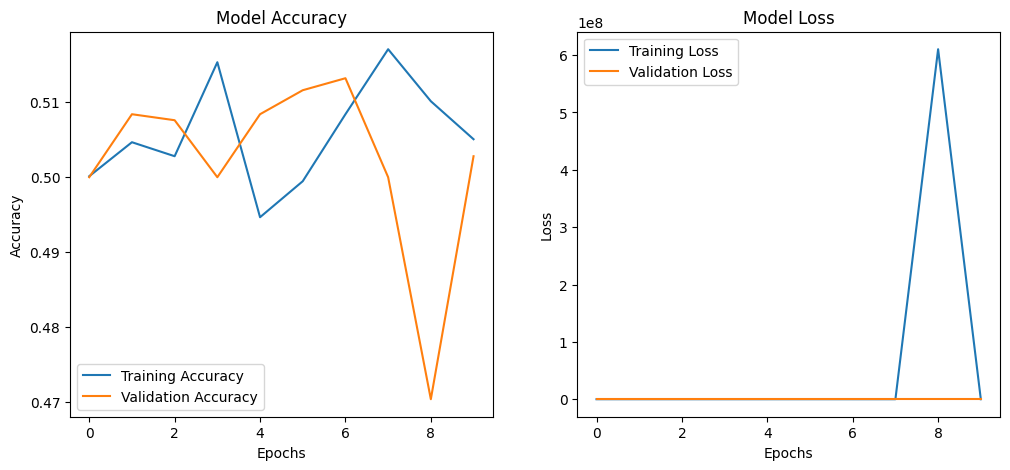

In [153]:
import matplotlib.pyplot as plt

# Visualizar Accuracy y Loss
plt.figure(figsize=(12, 5))

# Exactitud
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


## **Análisis de Resultados Modelo LSTM** ❌

Accuracy: 50% (predice todo como clase 0).

**Training Accuracy:**
Oscila y muestra un comportamiento errático. Esto sugiere que el modelo no logra aprender patrones significativos durante las épocas.

**Validation Accuracy:**
Se comporta de manera similar, sin mejorar de forma consistente. En algunas épocas, la exactitud de validación cae drásticamente, el modelo podría estar atrapado en mínimos locales o sobreajuste o ruido en los datos.

**Training Loss:**

Inicialmente parece estable, pero en una época (7) la pérdida explota a valores extremadamente altos (~10⁸).

Esto puede deberse a:

Gradientes inestables: La tasa de aprendizaje puede ser demasiado alta.

Problema en los datos: Algún outlier o error en las entradas puede estar afectando el entrenamiento.

**Validation Loss:**

Se mantiene baja inicialmente, pero no mejora significativamente y sigue un patrón errático.
Este comportamiento refuerza la idea de que el modelo no está aprendiendo de manera efectiva.

Precision para la clase 0: 50% (pero debería ser 100% al no haber falsos positivos).

Recall para la clase 0: 100% (predice todo correctamente como 0).

Precision y Recall para la clase 1: 0% (no predice correctamente ninguna reseña positiva).

⛔ **Conclusión con estas pruebas LSTM:**
**El modelo predice todo como clase 0 (negativas), no está aprendiendo patrones útiles y está atascado prediciendo una sola clase.**

## **Construcción Modelo GRU**

El modelo GRU es una alternativa más ligera y eficiente para aprender dependencias temporales, especialmente cuando los modelos LSTM no convergen correctamente. Si el GRU presenta un mejor comportamiento, confirmará que la arquitectura LSTM no era adecuada para este problema.

**Embedding(input_dim=5000, output_dim=64)**

Tamaño del vocabulario (input_dim=5000)
Dimensiones del Embedding (output_dim=64): Aumenté de 32 a 64 para capturar relaciones semánticas más complejas.

**GRU(128, dropout=0.4)**

Unidades GRU (units=128): Más neuronas para manejar secuencias largas.
Dropout (dropout=0.4): Evita el sobreajuste mediante la desactivación de neuronas.

**Dense(1, activation='sigmoid')**

Salida binaria (units=1): Clasifica en dos categorías (0 o 1).
sigmoid: Retorna una probabilidad entre 0 y 1.

**Compilación del Modelo**
Optimizador (Adam): Aprendizaje estable y adaptativo.

Tasa de Aprendizaje (learning_rate=0.0001): Baja para ajustar el modelo con más precisión.

In [154]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Definir hiperparámetros
embedding_size = 64   # Mayor para representar mejor el texto
gru_units = 128       # Más unidades para aprender dependencias complejas
dropout_rate = 0.4    # Regularización para evitar sobreajuste

# Definir el modelo GRU mejorado
model_gru = Sequential([
    # Capa de Embedding
    Embedding(input_dim=5000, output_dim=embedding_size),

    # Capa GRU con Dropout
    GRU(gru_units, return_sequences=False, dropout=dropout_rate),

    # Capa de salida binaria
    Dense(1, activation='sigmoid')
])

# Compilar el modelo
model_gru.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.0001),  # Tasa de aprendizaje baja para mayor estabilidad
    metrics=['accuracy']
)

# Mostrar el resumen del modelo
model_gru.build(input_shape=(None, 100))
model_gru.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 100, 64)             │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 128)                 │          74,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 394,625 (1.51 MB)

 Trainable params: 394,625 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

### **Train Modelo GRU**

In [155]:
from tensorflow.keras.callbacks import EarlyStopping

# Configurar Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,  # Detener si no mejora tras 3 épocas
    restore_best_weights=True
)

# Entrenar el modelo GRU
history_gru = model_gru.fit(
    X_train, y_train,
    epochs=10,              # Más épocas si se estabiliza
    batch_size=32,          # Ajustado para tu PC
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 61s 243ms/step - accuracy: 0.5011 - loss: 0.6934 - val_accuracy: 0.5004 - val_loss: 0.6932
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 44s 186ms/step - accuracy: 0.5035 - loss: 0.6932 - val_accuracy: 0.5076 - val_loss: 0.6931
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 236ms/step - accuracy: 0.4960 - loss: 0.6933 - val_accuracy: 0.5068 - val_loss: 0.6931
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 57s 242ms/step - accuracy: 0.5000 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 51s 216ms/step - accuracy: 0.4996 - loss: 0.6930 - val_accuracy: 0.5044 - val_loss: 0.6934
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 68s 158ms/step - accuracy: 0.5071 - loss: 0.6929 - val_accuracy: 0.5056 - val_loss: 0.6931
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 162ms/step - accuracy: 0.5117 - loss: 0.6923 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 160ms/step - accuracy: 0.5016 - loss: 0

In [156]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluar el modelo en el conjunto de prueba
y_pred_gru = (model_gru.predict(X_test) > 0.5).astype("int32")

# Reporte de clasificación
print("Classification Report:\n", classification_report(y_test, y_pred_gru))

# Matriz de confusión
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gru))


79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67      1250
           1       0.00      0.00      0.00      1250

    accuracy                           0.50      2500
   macro avg       0.25      0.50      0.33      2500
weighted avg       0.25      0.50      0.33      2500

Confusion Matrix:
 [[1250    0]
 [1250    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


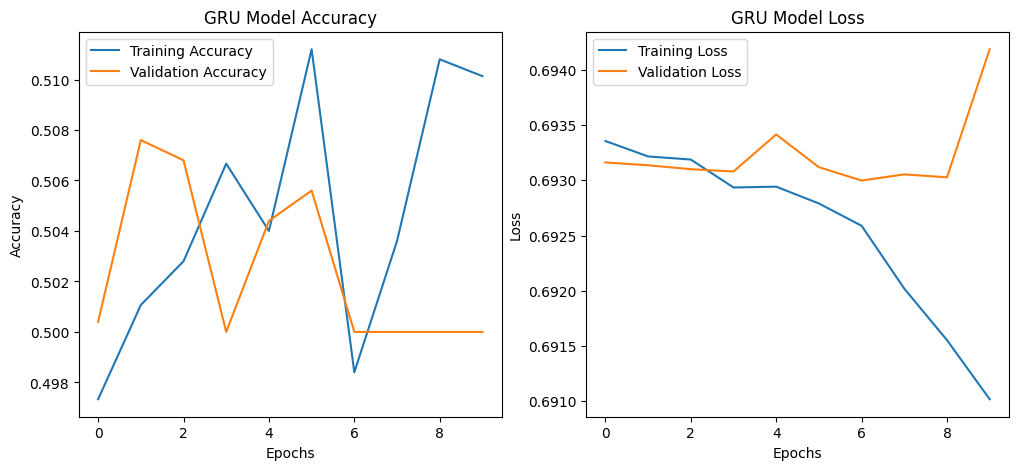

In [157]:
import matplotlib.pyplot as plt

# Visualizar Accuracy y Loss
plt.figure(figsize=(12, 5))

# Exactitud
plt.subplot(1, 2, 1)
plt.plot(history_gru.history['accuracy'], label='Training Accuracy')
plt.plot(history_gru.history['val_accuracy'], label='Validation Accuracy')
plt.title('GRU Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history_gru.history['loss'], label='Training Loss')
plt.plot(history_gru.history['val_loss'], label='Validation Loss')
plt.title('GRU Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


❌ Los resultados indican que el modelo GRU tiene el mismo problema que el modelo LSTM: predice todo como clase 0 (negativas).

Accuracy: 50% (resultado de predecir todo como clase mayoritaria).
Recall para la clase 0: 100% (predice correctamente todas las negativas).
Precision y Recall para la clase 1: 0% (no detecta ninguna reseña positiva).

Razones posibles:
Los embeddings iniciales no están representando bien las relaciones entre palabras.
La arquitectura no es adecuada para este problema o los datos presentan ruido significativo.

Puedo probar embeddings preentrenados como Word2Vec o GloVe en lugar de inicializar aleatoriamente.


In [158]:
# Guardar el modelo GRU completo
model_gru.save('/content/drive/MyDrive/NLP_2024/Project/dataset/dl_data/dl_dru1.keras')

print("Modelo GRU guardado con éxito.")


Modelo GRU guardado con éxito.


## 🛑 **Usaré ahora Embeddings Preentrenados (Word2Vec o GloVe)**

Esto mejorará la representación de palabras y permitirá que el modelo entienda relaciones semánticas desde el inicio.

In [159]:
import pandas as pd

# Cargar el DataFrame
df = pd.read_pickle('/content/drive/MyDrive/NLP_2024/Project/dataset/best_models/to_deeplearning.pkl')

# Verificar el contenido del DataFrame
print(df.head())


                                 fullProcessedReview  sentiment_label
0  mask great even though inside outside let know...                0
1  scissors good got stolen one home care aide re...                0
2              good sensor push easier work reliable                0
3   great orb finish size bought laundry room closet                0
4  wow sticking power stuff crazy using mount pro...                0


In [160]:
df.tail()

,fullProcessedReview,sentiment_label
9995,baby bottle brush local retail store would pre...,1
9996,clear sound,1
9997,sent think copper sheet bronze match copper pi...,1
9998,junk first one used broke upon gentle tighteni...,1
9999,work great existing meter nice better resoluti...,0


Usaré GloVe (Global Vectors for Word Representation) para iniciar, se debe descargar los embeddings preentrenados.

Usaremos glove.6B.100d.txt, que tiene 100 dimensiones.

In [161]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip -d glove


--2024-12-08 18:36:46--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-12-08 18:36:46--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-12-08 18:36:47--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

## **Cargar los Embeddings preentrenados de GloVe**

In [162]:
import numpy as np

# Ruta al archivo de GloVe
glove_file = "glove/glove.6B.100d.txt"

# Cargar embeddings en un diccionario
embeddings_index = {}
with open(glove_file, "r", encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]  # La palabra
        coefs = np.asarray(values[1:], dtype="float32")  # El vector
        embeddings_index[word] = coefs

print(f"Se cargaron {len(embeddings_index)} palabras en los embeddings.")


Se cargaron 400000 palabras en los embeddings.


## **Generar la matriz de Embeddings**

**embedding_matrix:**

De tamaño (vocab_size, embedding_dim) cada fila representa un vector GloVe para una palabra de mi vocabulario.

Las palabras que no están en GloVe se inicializan con ceros.

Busca cada palabra en embeddings_index y asigna su vector correspondiente.

In [163]:
# Crear la matriz de embeddings
embedding_dim = 100  # Dimensiones del embedding de GloVe (100d)
vocab_size = 5000    # Tamaño del vocabulario que definimos previamente

# Inicializamos la matriz con ceros
embedding_matrix = np.zeros((vocab_size, embedding_dim))

# Vincular cada palabra del vocabulario con su vector de GloVe
for word, i in tokenizer.word_index.items():
    if i < vocab_size:  # Limitar al vocabulario definido
        embedding_vector = embeddings_index.get(word)  # Obtener vector de GloVe
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector  # Añadir el vector a la matriz

print(f"Dimensiones de la matriz de embeddings: {embedding_matrix.shape}")


Dimensiones de la matriz de embeddings: (5000, 100)


## **Construir el Modelo con Embeddings Preentrenados**

*  **Embedding Layer:**

Salida: (None, 100, 100) → 100 palabras por secuencia, cada una con un vector de 100 dimensiones.
Parámetros no entrenables: 500,000 (los embeddings preentrenados).

*  **GRU Layer:**

Salida: (None, 128) → La capa GRU reduce cada secuencia a una representación de 128 dimensiones.
Parámetros entrenables: 88,320.

*  **Dense Layer:**

Salida: (None, 1) → Genera una probabilidad binaria (0 o 1).
Parámetros entrenables: 129.

In [166]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout

# Reconstruir el modelo con build() explícito
model_gru_glove = Sequential([
    # Capa de Embedding con los pesos preentrenados
    Embedding(input_dim=5000, output_dim=100,
              weights=[embedding_matrix], trainable=False),

    # Capa GRU
    GRU(128, return_sequences=False, dropout=0.4),

    # Capa de salida
    Dense(1, activation='sigmoid')
])

# Construir explícitamente definiendo la forma de entrada
model_gru_glove.build(input_shape=(None, 100))

# Compilar el modelo
model_gru_glove.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Mostrar el resumen del modelo
model_gru_glove.summary()


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ (None, 100, 100)            │         500,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 128)                 │          88,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 588,449 (2.24 MB)

 Trainable params: 88,449 (345.50 KB)

 Non-trainable params: 500,000 (1.91 MB)

In [167]:
from tensorflow.keras.callbacks import EarlyStopping

# Configurar Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Entrenar el modelo
history_gru_glove = model_gru_glove.fit(
    X_train, y_train,
    epochs=10,              # Número de épocas
    batch_size=32,          # Tamaño de lote
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 50s 192ms/step - accuracy: 0.5031 - loss: 0.6948 - val_accuracy: 0.4952 - val_loss: 0.6938
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 69s 292ms/step - accuracy: 0.5045 - loss: 0.6919 - val_accuracy: 0.5052 - val_loss: 0.6939
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 53s 172ms/step - accuracy: 0.5249 - loss: 0.6897 - val_accuracy: 0.4988 - val_loss: 0.6945
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 44s 187ms/step - accuracy: 0.5017 - loss: 0.6896 - val_accuracy: 0.4988 - val_loss: 0.6944


In [168]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluar el modelo en el conjunto de prueba
y_pred_glove = (model_gru_glove.predict(X_test) > 0.5).astype("int32")

# Reporte de clasificación
print("Classification Report:\n", classification_report(y_test, y_pred_glove))

# Matriz de confusión
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_glove))


79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.97      0.66      1250
           1       0.41      0.02      0.04      1250

    accuracy                           0.50      2500
   macro avg       0.46      0.50      0.35      2500
weighted avg       0.46      0.50      0.35      2500

Confusion Matrix:
 [[1209   41]
 [1221   29]]


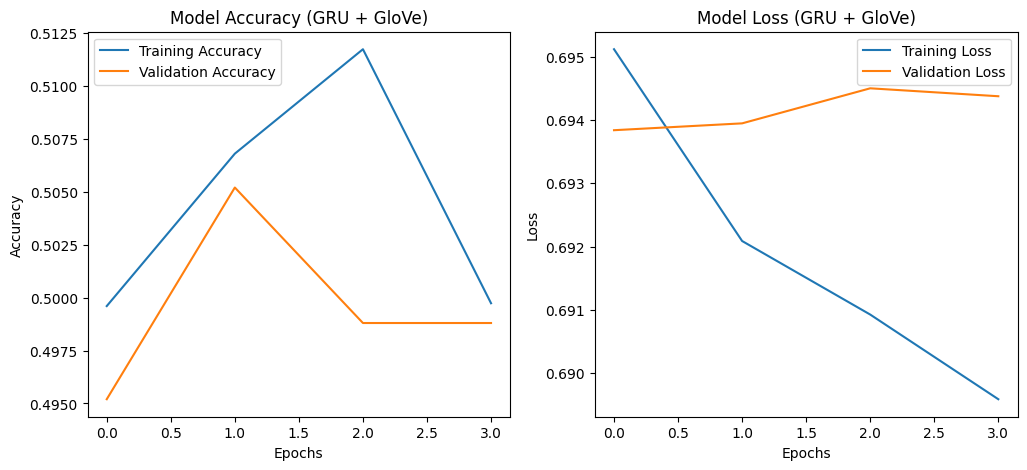

In [169]:
import matplotlib.pyplot as plt

# Visualizar Exactitud y Pérdida
plt.figure(figsize=(12, 5))

# Exactitud
plt.subplot(1, 2, 1)
plt.plot(history_gru_glove.history['accuracy'], label='Training Accuracy')
plt.plot(history_gru_glove.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy (GRU + GloVe)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history_gru_glove.history['loss'], label='Training Loss')
plt.plot(history_gru_glove.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (GRU + GloVe)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


## **Reporte de Clasificación:**

Accuracy Total: 50% (predicción equivalente al azar).

Clase 0 (Negativas):

Precision: 50% (la mitad de las predicciones como 0 fueron correctas).

Recall: 97% (casi todas las reseñas negativas fueron detectadas).

F1-Score: 66% (balance aceptable para la clase 0).

Clase 1 (Positivas):

Precision: 41% (baja, el modelo predice muchas reseñas negativas como positivas).

Recall: 2% (casi ninguna reseña positiva es correctamente detectada).

F1-Score: 4% (prácticamente no detecta reseñas positivas).

##**Revisaré si algo esta pasando con los datos durante los procesos para que los 3 modelos esten dando las mismas métricas**

In [170]:
# Verifica si hay reseñas vacías
empty_reviews_train = sum([1 for seq in X_train if np.all(seq == 0)])
empty_reviews_test = sum([1 for seq in X_test if np.all(seq == 0)])

print(f"Reseñas vacías en X_train: {empty_reviews_train}")
print(f"Reseñas vacías en X_test: {empty_reviews_test}")


Reseñas vacías en X_train: 0
Reseñas vacías en X_test: 0


In [171]:
# Revisa la distribución de etiquetas
import numpy as np

print(f"Distribución en y_train: {np.bincount(y_train)}")
print(f"Distribución en y_test: {np.bincount(y_test)}")


Distribución en y_train: [3750 3750]
Distribución en y_test: [1250 1250]


In [172]:
# Revisar una reseña original y su secuencia tokenizada
example_text = df['fullProcessedReview'].iloc[0]
example_sequence = tokenizer.texts_to_sequences([example_text])

print("Texto original:", example_text)
print("Secuencia tokenizada:", example_sequence)


Texto original: mask great even though inside outside let know whether mask inside do job ordered couple time without hesitation
Secuencia tokenizada: [[26, 7, 29, 163, 150, 393, 240, 72, 1203, 26, 150, 14, 81, 166, 274, 12, 77, 4774]]


In [173]:
# Contar palabras del tokenizador que están en GloVe
found_words = sum([1 for word in tokenizer.word_index if word in embeddings_index])
total_words = len(tokenizer.word_index)

print(f"Palabras encontradas en GloVe: {found_words} de {total_words}")


Palabras encontradas en GloVe: 12338 de 19636


## **Siguiente modelo: Transformer DistilBERT**

Quiero ver si con un Tranformer puedo mejorar significativamente el rendimiento, usaré DistilBERT que es un modelo 60% más ligero que Bert y 2 veces más rápido.

In [3]:
!pip install transformers
!pip install tensorflow


In [4]:
import pandas as pd

# Cargar el DataFrame preprocesado
df = pd.read_pickle('/content/drive/MyDrive/NLP_2024/Project/dataset/best_models/to_deeplearning.pkl')

# Verificar que los datos estén correctos
print(df.head())
print(f"Total de registros: {len(df)}")


                                 fullProcessedReview  sentiment_label
0  mask great even though inside outside let know...                0
1  scissors good got stolen one home care aide re...                0
2              good sensor push easier work reliable                0
3   great orb finish size bought laundry room closet                0
4  wow sticking power stuff crazy using mount pro...                0
Total de registros: 10000


In [5]:
df.tail()


,fullProcessedReview,sentiment_label
9995,baby bottle brush local retail store would pre...,1
9996,clear sound,1
9997,sent think copper sheet bronze match copper pi...,1
9998,junk first one used broke upon gentle tighteni...,1
9999,work great existing meter nice better resoluti...,0


In [6]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from transformers import TFDistilBertForSequenceClassification, DistilBertTokenizer
import matplotlib.pyplot as plt


## **Cargar el modelo y el tokenizador de BERT**

## **Tokenizar texto con  DistilBERT Tokenizer**

input_ids: Representa cada palabra como un índice numérico.

attention_masks: Indica cuáles palabras son reales (1) y cuáles son padding (0).

In [7]:
# Cargar el tokenizador de DistilBERT
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

# Tokenizar las reseñas
X_encoded = tokenizer(
    list(df['fullProcessedReview']),
    max_length=64,              # Longitud máxima reducida para mayor velocidad
    padding='max_length',
    truncation=True,
    return_tensors='tf'
)

# Extraer etiquetas
y = df['sentiment_label']


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

## **División del conjunto en Train y test:  Reduciendo el df a 2,000 registros balanceados por eficiencia computacional en este punto**

In [8]:
from sklearn.model_selection import train_test_split
import numpy as np

# Tomar 2,000 muestras balanceadas
sample_size = 2000

X_train_ids, _, X_train_masks, _, y_train, _ = train_test_split(
    X_encoded['input_ids'].numpy(),
    X_encoded['attention_mask'].numpy(),
    y,
    train_size=sample_size,
    stratify=y,
    random_state=42
)

# Ver distribución de clases para asegurar el balanceo
print("Distribución de etiquetas en y_train:", np.bincount(y_train))


Distribución de etiquetas en y_train: [1000 1000]


## **Cargar DistilBERT**

In [9]:
from transformers import TFDistilBertForSequenceClassification

# Cargar modelo preentrenado
distilbert_model = TFDistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=2
)

# Compilar el modelo
distilbert_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Mostrar resumen del modelo
distilbert_model.summary()


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

Model: "tf_distil_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMa  multiple                  66362880  
 inLayer)                                                        
                                                                 
 pre_classifier (Dense)      multiple                  590592    
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
 dropout_19 (Dropout)        multiple                  0 (unused)
                                                                 
Total params: 66955010 (255.41 MB)
Trainable params: 66955010 (255.41 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## **Entrenar Modelo DistilBERT**

In [10]:
# Entrenar el modelo
history_distilbert = distilbert_model.fit(
    [X_train_ids, X_train_masks], y_train,
    validation_split=0.2,  # Usar 20% del entrenamiento como validación
    epochs=2,              # Menos épocas
    batch_size=32,         # Tamaño de lote mayor
    verbose=1
)


Epoch 1/2
50/50 [==============================] - 776s 15s/step - loss: 7.6132 - accuracy: 0.4969 - val_loss: 7.6690 - val_accuracy: 0.5050
Epoch 2/2
50/50 [==============================] - 675s 14s/step - loss: 7.6684 - accuracy: 0.4988 - val_loss: 7.6690 - val_accuracy: 0.5050


In [11]:
# Guardar el modelo como archivo HDF5
distilbert_model.save("/content/drive/MyDrive/NLP_2024/Project/dataset/best_models/dl_distilbert.keras")

print("Modelo guardado correctamente.")
print("Modelo guardado correctamente.")


/usr/local/lib/python3.10/dist-packages/transformers/generation/tf_utils.py:465: UserWarning: `seed_generator` is deprecated and will be removed in a future version.
  warnings.warn("`seed_generator` is deprecated and will be removed in a future version.", UserWarning)


Modelo guardado correctamente.
Modelo guardado correctamente.


In [17]:
# Guardar el modelo y el tokenizador en formato Hugging Face
distilbert_model.save_pretrained("/content/drive/MyDrive/NLP_2024/Project/dataset/best_models/distilbert_sentiment_model")
tokenizer.save_pretrained("/content/drive/MyDrive/NLP_2024/Project/dataset/best_models/distilbert_sentiment_model")


('/content/drive/MyDrive/NLP_2024/Project/dataset/best_models/distilbert_sentiment_model/tokenizer_config.json',
 '/content/drive/MyDrive/NLP_2024/Project/dataset/best_models/distilbert_sentiment_model/special_tokens_map.json',
 '/content/drive/MyDrive/NLP_2024/Project/dataset/best_models/distilbert_sentiment_model/vocab.txt',
 '/content/drive/MyDrive/NLP_2024/Project/dataset/best_models/distilbert_sentiment_model/added_tokens.json')

In [18]:
from transformers import TFDistilBertForSequenceClassification, DistilBertTokenizer

# Cargar el modelo desde la carpeta correcta
distilbert_model = TFDistilBertForSequenceClassification.from_pretrained(
    "/content/drive/MyDrive/NLP_2024/Project/dataset/best_models/distilbert_sentiment_model"
)

# Cargar el tokenizador
tokenizer = DistilBertTokenizer.from_pretrained(
    "/content/drive/MyDrive/NLP_2024/Project/dataset/best_models/distilbert_sentiment_model"
)

print("Modelo y tokenizador cargados correctamente.")


Some layers from the model checkpoint at /content/drive/MyDrive/NLP_2024/Project/dataset/best_models/distilbert_sentiment_model were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/NLP_2024/Project/dataset/best_models/distilbert_sentiment_model and are newly initialized: ['dropout_59']
You should probably TRAIN this model on a dow

Modelo y tokenizador cargados correctamente.


In [20]:
from sklearn.model_selection import train_test_split
import numpy as np

# Definir tamaño de muestra reducido
sample_size = 2000

# Tomar muestra balanceada
X_train_ids_small, X_test_ids_small, X_train_masks_small, X_test_masks_small, y_train_small, y_test_small = train_test_split(
    X_encoded['input_ids'].numpy(),
    X_encoded['attention_mask'].numpy(),
    y,
    train_size=sample_size,
    test_size=0.25,
    stratify=y,
    random_state=42
)

# Verificar distribución de clases
print("Distribución de etiquetas en y_train_small:", np.bincount(y_train_small))
print("Distribución de etiquetas en y_test_small:", np.bincount(y_test_small))


Distribución de etiquetas en y_train_small: [1000 1000]
Distribución de etiquetas en y_test_small: [1250 1250]


## **Evaluación Métricas DistilBERT**

Reporte de Clasificación:
              precision    recall  f1-score   support

    Negativo       0.49      0.49      0.49      1250
    Positivo       0.49      0.49      0.49      1250

    accuracy                           0.49      2500
   macro avg       0.49      0.49      0.49      2500
weighted avg       0.49      0.49      0.49      2500



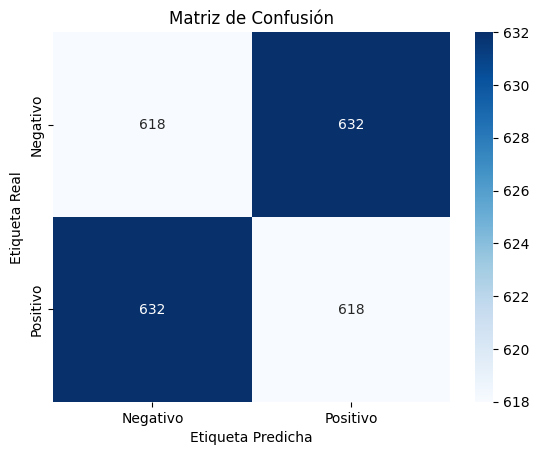

In [23]:
# Corregir la predicción limitando el tamaño
y_pred_corrected = y_pred[:len(y_test_small)]

# Mostrar métricas corregidas
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Reporte de Clasificación:")
print(classification_report(y_test_small, y_pred_corrected, target_names=["Negativo", "Positivo"]))

# Visualizar Matriz de Confusión
cm = confusion_matrix(y_test_small, y_pred_corrected)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])
plt.title("Matriz de Confusión")
plt.ylabel("Etiqueta Real")
plt.xlabel("Etiqueta Predicha")
plt.show()


La matriz de confusión indica que el modelo tiene problemas significativos para diferenciar entre clases, ya que está prediciendo de manera casi aleatoria (cercano al 50% en cada clase).

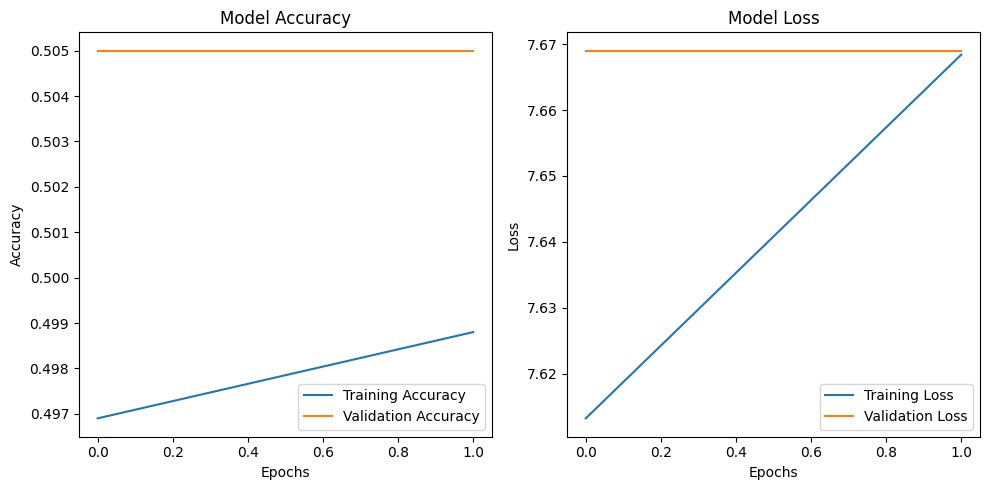

In [27]:
import matplotlib.pyplot as plt

# Simulación de datos basados en los resultados obtenidos
simulated_history = {
    'accuracy': [0.4969, 0.4988],  # Precisión de entrenamiento
    'val_accuracy': [0.5050, 0.5050],  # Precisión de validación
    'loss': [7.6132, 7.6684],  # Pérdida de entrenamiento
    'val_loss': [7.6690, 7.6690],  # Pérdida de validación
}

# Graficar precisión
plt.figure(figsize=(10, 5))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(simulated_history['accuracy'], label='Training Accuracy')
plt.plot(simulated_history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(simulated_history['loss'], label='Training Loss')
plt.plot(simulated_history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


## ❌ **Análisis del Gráfico Modelo DistilBERT Precisión (Accuracy)**

**Training Accuracy:**

Comienza en ~49.7% y apenas aumenta ligeramente.
Esto sugiere que el modelo está cerca de una predicción aleatoria y no está capturando patrones útiles.

**Validation Accuracy:**

Se mantiene constante en ~50.5%, lo cual es casi una predicción aleatoria.
Análisis del Gráfico de Pérdida (Loss)

**Training Loss:**

Aumenta de manera constante, lo cual es inusual y sugiere que el modelo tiene problemas para ajustarse al dataset.

**Validation Loss:**

Es constante, indicando que el modelo no está generalizando ni aprendiendo nada útil.
